In [42]:
import os
import os.path
import sys
import shutil
from pprint import pprint
from datetime import datetime
from copy import copy
from copy import deepcopy
import pickle

from parflowio.pyParflowio import PFData

import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.cbook as cbook
import seaborn as sns
from seaborn import pairplot
from seaborn import jointplot
from matplotlib.path import Path
from matplotlib.patches import PathPatch

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import glob


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


# -- Libararies  
import os
import sys
import pickle
import torch
from random import *

# for SBI
from sbi import utils as utils
from sbi import analysis as analysis
from sbi import inference
from sbi.inference.base import infer
from sbi.inference import SNPE, simulate_for_sbi, prepare_for_sbi
from sbi.types import Array, OneOrMore, ScalarFloat

from matplotlib import pyplot as plt

import numpy as np
from numpy import cov
from numpy.linalg import det, norm # determinant, norm (used to calculate 'euclidean' distance)

import random
from numpy.random import normal
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from seaborn import pairplot
from seaborn import jointplot
import pandas as pd
from parflowio.pyParflowio import PFData
# import pygmmis <- This was the default but it doesn't work very well
from sklearn.mixture import GaussianMixture as GMM
import sys
import os
from datetime import datetime

# for machine learning
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset # for refactoring x and y
from torch.utils.data import DataLoader # for batch submission
from torch.autograd import Variable
import torch.nn.functional as F
from torch.distributions import Independent, Uniform
from torch.distributions.log_normal import LogNormal

# for scaling
from sklearn.preprocessing import MinMaxScaler

# for stats
sys.path.append('/home/qh8373/SBI_TAYLOR/sbi_taylor/scripts/05_utils/')
from assessutils import compute_stats
import re
from scipy.stats import mode

# helpers
sys.path.append('/home/qh8373/SBI_TAYLOR/sbi_taylor/scripts/03_sbi_lstm/')
from sbi_build import simulate

# Path to the SandTank Repo
dev_path = '/home/SHARED/ML_TV/HydroGEN/modules/'
#Add Sand Tank path to the sys path
sys.path.append(dev_path)
from transform import float32_clamp_scaling

import spotpy
import spotpy.objectivefunctions as obj_mets

# user defined functions
sys.path.append('/home/qh8373/SBI_TAYLOR/sbi_taylor/scripts/05_utils/')
from genutils import PFread, plot_stuff, convertNumpy
from ensembleutils import assembleYears, assembleAllForcings, parseAllMetadata, returnDF_ens, returnAOC_ens, _ret_MinMax, _ret_AOCMinMax
from assessutils import compute_stats
from scalerutils import scaled_ens_Values, scaledForcingData, scaledAOCData
from posteriorsamputils import statTheta, genProbThetas, gen_Fit_Series_Wrapper
from summaryutils import summary, setStatSim
from sbiutils import retStatTyp, parseListDf, parseUniqueParams
from sbiutils import reshape_y, createYHatList, createYHat
from interputils import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.tri as tri
import pickle
import sys
import torch

In [49]:
# Directories
sbi_run  = '0819_01_mod2_02_05_lstm_A_0206_01_full_surrogate'
print(sbi_run)
sbi_dir = f'/home/qh8373/SBI_TAYLOR/data/05_sbi_out/{sbi_run}/'
save_dir = f'/home/qh8373/SBI_TAYLOR/data/06_interp_out/experiments/{sbi_run}/'
print(save_dir)

lstm_name = '02_05_lstm_A' # '02_09_lstm_C'
lstm_path = f'/home/qh8373/SBI_TAYLOR/data/04_lstm_out/{lstm_name}/'

lstm_idx = '_00' # '_00'

# load lstm info
with open(lstm_path+'list_df_cond.pkl', 'rb') as fp:
    list_df_cond = pickle.load(fp)
    
with open(lstm_path+lstm_name+lstm_idx+'/AOC_ens_scale_l_idx_train.pkl', 'rb') as fp:
    AOC_ens_scale_l_idx_train = pickle.load(fp)
     
with open(lstm_path+lstm_name+lstm_idx+'/AOC_ens_scale_l_idx_val.pkl', 'rb') as fp:
    AOC_ens_scale_l_idx_val = pickle.load(fp)
    
with open(lstm_path+'AOC_ens_scale_l_idx_test.pkl', 'rb') as fp:
    AOC_ens_scale_l_idx_test = pickle.load(fp)

0819_01_mod2_02_05_lstm_A_0206_01_full_surrogate
/home/qh8373/SBI_TAYLOR/data/06_interp_out/experiments/0819_01_mod2_02_05_lstm_A_0206_01_full_surrogate/


0.5994850021680094 0.8494850021680094


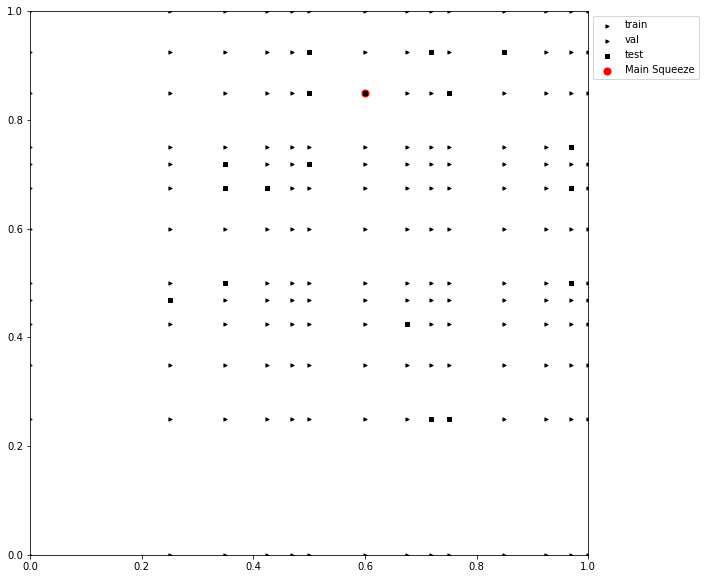

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(AOC_ens_scale_l_idx_train[:,0], AOC_ens_scale_l_idx_train[:,1], s=10, label='train',
          color='black', marker=">")
ax.scatter(AOC_ens_scale_l_idx_val[:,0], AOC_ens_scale_l_idx_val[:,1], s=10,  label='val',
          color='black', marker=">")
ax.scatter(AOC_ens_scale_l_idx_test[:,0], AOC_ens_scale_l_idx_test[:,1], s=10,   label='test', 
           color='black', zorder=1, marker="s")
ax.scatter(AOC_ens_scale_l_idx_test[1,0], AOC_ens_scale_l_idx_test[1,1], s=50, 
           zorder=0, color='red',   label='Main Squeeze')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(f'{save_dir}parameterspace_all.png')
fig.savefig(f'{save_dir}parameterspace_all.eps', format='eps')

print(AOC_ens_scale_l_idx_test[1,0], AOC_ens_scale_l_idx_test[1,1])

plt.show()
